## **Previsão e Redução de  / Predicting and Reducing Customer Churn**

**Clara Álvares Camargo**  
Outubro/2024

## 0. Bibliotecas

In [1]:
# importando bibliotecas
import pandas as pd

In [2]:
# importando bibliotecas
from matplotlib import pyplot as plt

In [3]:
# importando bibliotecas
import seaborn as sns

In [4]:
# importando bibliotecas
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
# importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


## 1. EDA

### 1.0 Carregamento dos dados

In [6]:
# carregando os dados brutos
gym_churn_raw = pd.read_csv('./gym_churn_us.csv')

In [7]:
# visualizando os dados
gym_churn_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [8]:
# visualizando amostra dos dados
gym_churn_raw.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [9]:
# visualizando amostra dos dados
gym_churn_raw.tail()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [10]:
# visualizando amostra dos dados
gym_churn_raw.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2496,1,1,0,0,0,1,1,32,11.533210,1.0,20,2.272123,2.487436,0
1830,0,1,1,1,1,12,0,32,338.424166,12.0,8,3.184782,3.189812,0
1509,0,0,0,0,1,1,0,21,220.529066,1.0,0,1.565612,1.660564,1
61,0,1,1,0,1,6,0,32,55.774418,5.0,6,0.813561,0.874677,0
3911,0,1,0,0,1,6,1,24,134.766193,6.0,0,2.448758,2.139388,1


### 1.1 Tratamento dos dados

In [11]:
# convertendo o nome das colunas para lowercase
gym_churn_raw.columns = gym_churn_raw.columns.str.lower()

In [12]:
# renomeando DataFrame
gym_churn = gym_churn_raw

### 1.2 Análise exploratória dos dados

#### 1.2.1 Média e desvio padrão

In [13]:
# visualizando a média e desvio padrão das características
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [14]:
# calculando a proporção das classes na coluna 'churn'
churn_proportion = gym_churn['churn'].value_counts(normalize=True) * 100
churn_proportion

churn
0    73.475
1    26.525
Name: proportion, dtype: float64

#### 1.2.2 Média dos valores médios

In [15]:
# agrupando por churn e calculando a média de cada característica por grupo
group_churn_mean = gym_churn_raw.groupby('churn').mean()
group_churn_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### 1.2.3 Gráficos por característica por grupo

In [16]:
# substituindo valores infinitos por NaN no DataFrame*
gym_churn = gym_churn.replace([float('inf'), -float('inf')], pd.NA)

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

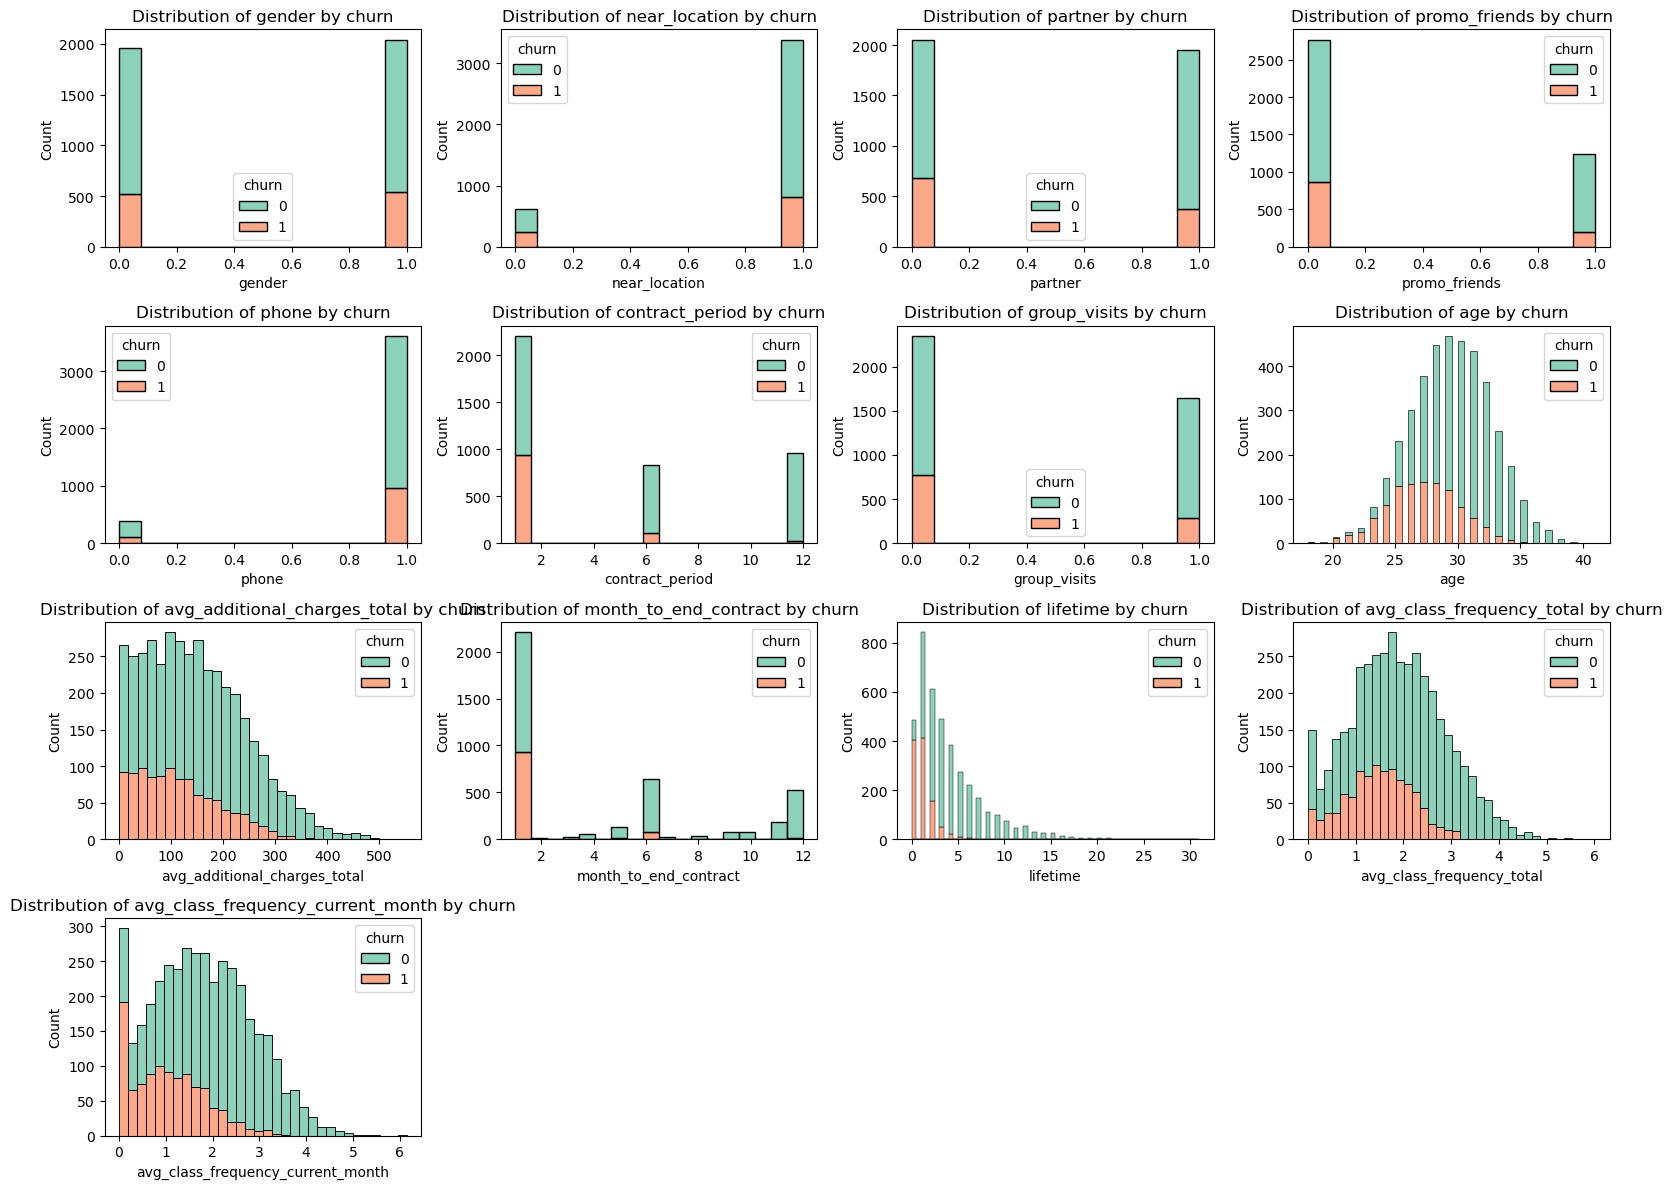

In [17]:
# dimensionando o gráfico
plt.figure(figsize=(16, 12))

# lista de características para os gráficos
columns_to_plot = [
    'gender', 'near_location', 'partner', 'promo_friends', 'phone',
    'contract_period', 'group_visits', 'age', 'avg_additional_charges_total',
    'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
    'avg_class_frequency_current_month'
]

# função para impressão dos gráficos
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=gym_churn, x=column, hue='churn', multiple="stack", kde=False, palette="Set2")
    plt.title(f'Distribution of {column} by churn')
    plt.tight_layout()

plt.show()

#### 1.2.4 Conclusões

1. **Gênero (Gender):** 
   - A distribuição é bastante uniforme, com pouca variação entre os grupos de churn.
   - O gênero parece ter pouco impacto sobre o cancelamento.

2. **Localização Próxima (Near_Location):** 
   - A maioria dos clientes que não cancelaram vive perto da academia.
   - Entre os que cancelaram, uma proporção maior vive distante, sugerindo que a proximidade pode influenciar a retenção.

3. **Parceiro (Partner):** 
   - Clientes com parcerias são mais propensos a permanecer.
   - Aqueles sem parcerias são mais propensos a cancelar.

4. **Promoções de Amigos (Promo_friends):** 
   - A maioria dos clientes que utilizou promoções de amigos tende a não cancelar.
   - Promoções podem ser uma ferramenta eficaz de retenção.

5. **Telefone (Phone):** 
   - Não há uma correlação forte entre fornecer um número de telefone e o cancelamento.

6. **Período do Contrato (Contract_period):** 
   - Clientes com contratos mais longos (6-12 meses) são menos propensos a cancelar.
   - Aqueles com contratos curtos (1 mês) têm uma taxa de cancelamento mais alta.

7. **Visitas em Grupo (Group_visits):** 
   - Clientes que participam de atividades em grupo são mais propensos a permanecer.
   - Atividades coletivas podem ajudar a reter clientes.

8. **Idade (Age):** 
   - Clientes mais jovens (20-30 anos) são mais propensos a cancelar.
   - Clientes mais velhos tendem a permanecer.

9. **Custo Adicional Médio (Avg_additional_charges_total):** 
   - Clientes que gastam mais em serviços adicionais tendem a permanecer.
   - Aqueles com menores gastos estão mais propensos ao churn.

10. **Meses Restantes no Contrato (Month_to_end_contract):** 
    - Aqueles com mais meses restantes são menos propensos a cancelar.
    - Clientes com poucos meses restantes têm maior tendência ao churn.

11. **Tempo de Vida como Cliente (Lifetime):** 
    - Clientes de longa data tendem a permanecer.
    - Aqueles com um tempo de vida mais curto apresentam maiores taxas de cancelamento.

12. **Frequência Média de Aulas (Avg_class_frequency_total e Avg_class_frequency_current_month):** 
    - Clientes com uma frequência maior de aulas tendem a permanecer.
    - Aqueles com menor frequência têm mais probabilidade de cancelar.

**Conclusão:**
Essas observações indicam que fatores como proximidade da academia, uso de promoções, envolvimento em atividades de grupo e frequência nas aulas estão relacionados à retenção de clientes.


#### 1.2.5 Matriz de correlação

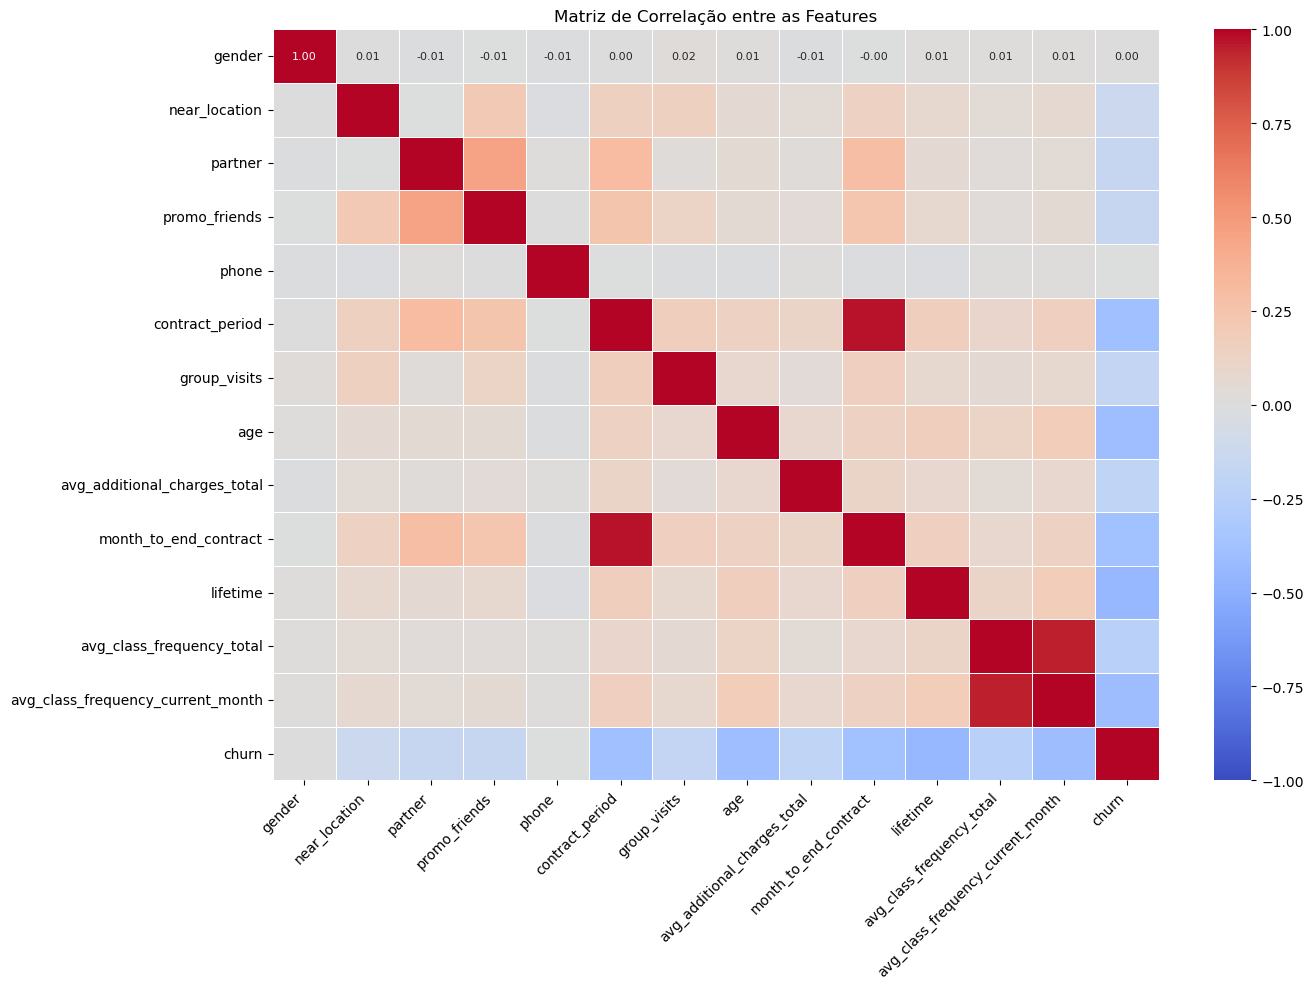

In [18]:
# Construindo a matriz de correlação
correlation_matrix = gym_churn.corr()

# Exibindo a matriz de correlação com valores anotados com apenas 1 casa decimal
plt.figure(figsize=(14, 10))  # Aumenta o tamanho da figura para melhorar a visibilidade
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 8})

plt.title('Matriz de Correlação entre as Features')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotaciona os labels das colunas
plt.tight_layout()  # Ajusta o layout
plt.show()



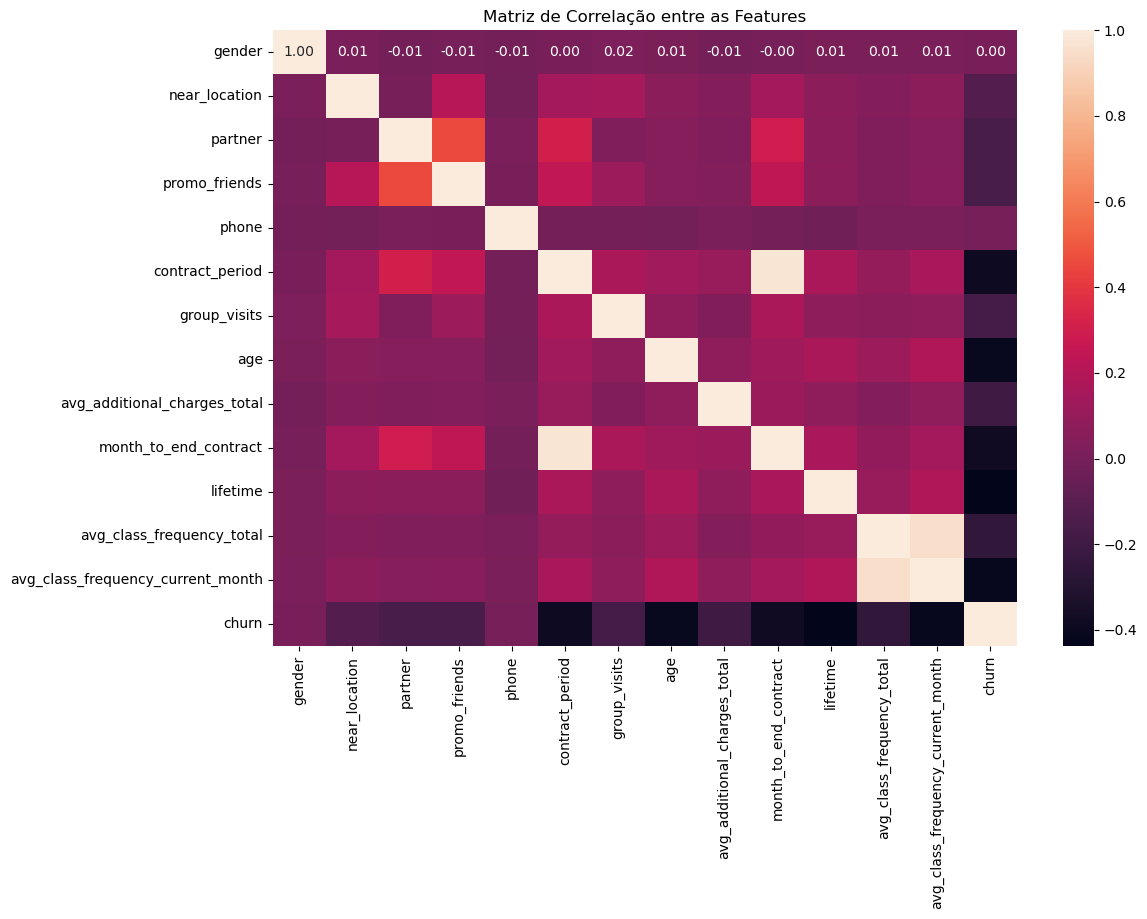

In [19]:
# Construindo a matriz de correlação
correlation_matrix = gym_churn.corr()

# Exibindo a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlação entre as Features')
plt.show()

## 2. Modelo para **predição da rotatividade de clientes**

### 2.1 Divisão dos dados de **treinamento** e **validação**

In [20]:
# removendo a coluna 'Churn' das características
X = gym_churn.drop('churn', axis=1)
# difinindo a variável alvo 'Churn'
y = gym_churn['churn']

In [21]:
# dividindo os dados em treino e validação (80% treino e 20% validação)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# verificando as dimensões dos conjuntos de treino e validação
print("Dimensões do conjunto de treino:", X_train.shape)
print("Dimensões do conjunto de validação:", X_val.shape)

Dimensões do conjunto de treino: (3200, 13)
Dimensões do conjunto de validação: (800, 13)


In [22]:
# aplicando a normalização
scaler = StandardScaler()

# ajustando o scaler ao conjunto de treino e transformando os dados de treino e validação
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# verificando as dimensões após a normalização
print("Dimensões do conjunto de treino normalizado:", X_train_scaled.shape)
print("Dimensões do conjunto de validação normalizado:", X_val_scaled.shape)

Dimensões do conjunto de treino normalizado: (3200, 13)
Dimensões do conjunto de validação normalizado: (800, 13)


### 2.2 Treinamento do modelo

#### 2.2.1 Regressão logística

In [23]:
# criando e treinando o modelo de Regressão Logística com os dados normalizados
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)  

# fazendo previsões no conjunto de validação com o modelo de Regressão Logística
y_pred_logistic = logistic_model.predict(X_val_scaled) 

In [24]:
# avaliando a acurácia do modelo de regressão logística
logistic_accuracy = accuracy_score(y_val, y_pred_logistic)
print(f"Acurácia do modelo de Regressão Logística: {logistic_accuracy:.4f}")

Acurácia do modelo de Regressão Logística: 0.9163


In [25]:
# avaliando a precisão do modelo de regressão logística
logistic_precision = precision_score(y_val, y_pred_logistic)
print(f"Precisão do modelo de Regressão Logística: {logistic_precision:.4f}")

Precisão do modelo de Regressão Logística: 0.8729


In [26]:
# avaliando a sensibilidade do modelo de regressão logística
logistic_recall = recall_score(y_val, y_pred_logistic)
print(f"Sensibilidade do modelo de Regressão Logística: {logistic_recall:.4f}")

Sensibilidade do modelo de Regressão Logística: 0.7822


#### 2.2.2 Floresta aleatória

In [27]:
# criando e treinar o modelo de floresta aleatória
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# fazendo previsões no conjunto de validação com o modelo de floresta aleatória
y_pred_rf = random_forest_model.predict(X_val)

In [28]:
# avaliando a acurácia do modelo de floresta aleatória
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Acurácia do modelo de Floresta Aleatória: {rf_accuracy:.4f}")

Acurácia do modelo de Floresta Aleatória: 0.9100


In [29]:
# avaliando a precisão do modelo de floresta aleatória
rf_precision = precision_score(y_val, y_pred_rf)
print(f"Precisão do modelo de Floresta Aleatória: {rf_precision:.4f}")

Precisão do modelo de Floresta Aleatória: 0.8495


In [30]:
# avaliando a sensibilidade do modelo de floresta aleatória
rf_recall = recall_score(y_val, y_pred_rf)
print(f"Sensibilidade do modelo de Floresta Aleatória: {rf_recall:.4f}")

Sensibilidade do modelo de Floresta Aleatória: 0.7822


#### 2.3 Comparação de modelos

**Regressão Logística:**  
Acurácia: 0.9163    
Precisão: 0.8729  
Sensibilidade (Recall): 0.7822  
  
**Floresta Aleatória:**  
Acurácia: 0.9100  
Precisão: 0.8495  
Sensibilidade (Recall): 0.7822  
  
**Comparação:**   
Acurácia: A regressão logística teve uma acurácia ligeiramente melhor (0.9163) em comparação com a floresta aleatória (0.9100).  
Precisão: A regressão logística também teve uma precisão mais alta (0.8729) do que a floresta aleatória (0.8495). Isso significa que o modelo de regressão logística teve menos falsos positivos.  
Sensibilidade (Recall): Ambas as técnicas apresentaram a mesma sensibilidade (0.7822), indicando que têm a mesma capacidade de identificar corretamente os casos positivos (menos falsos negativos).  
   
**Conclusão:**  
Embora ambos os modelos apresentem bom desempenho, a regressão logística oferece uma acurácia ligeiramente melhor e uma maior precisão em comparação à floresta aleatória. Portanto, para esse conjunto de dados, a regressão logística parece ser o modelo mais adequado, especialmente se quisermos minimizar falsos positivos. No entanto, os resultados são bastante próximos, então a escolha do modelo pode depender das prioridades específicas da aplicação (como minimizar falsos positivos ou falsos negativos).

## 3. Agrupamento de clientes

### 3.1 Padronização dos dados

In [31]:
# separando os dados e a variável 'Churn'
X = gym_churn.drop(columns=['churn'])
y = gym_churn['churn']

# padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# convertendo os dados padronizados de volta para DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

### 3.2 Matriz de distâncias e dendrograma

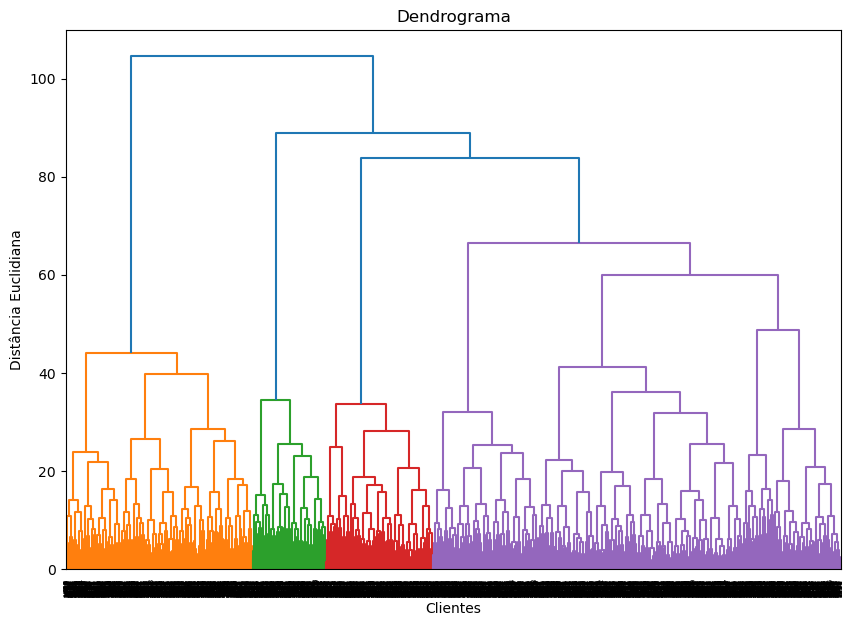

In [32]:
# calculando a matriz de linkage
Z = linkage(X_scaled, method='ward')

# plotando o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distância Euclidiana')
plt.show()

### 3.3 Treinamento do modelo com algoritmo K-Means com n=5

In [33]:
# definindo o número de agrupamentos
n_clusters = 5

# treinando o modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# adicionando os agrupamentos ao DataFrame
gym_churn['Cluster'] = kmeans.labels_

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 3.4 Valores médios das características por agrupamento

In [34]:
# calculando os valores médios das características para cada agrupamento
cluster_means = gym_churn.groupby('Cluster').mean()
print(cluster_means)

           gender  near_location   partner  promo_friends  phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         contract_period  group_visits        age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         avg_additional_charges_total  month_to_end_contract  lifetime  \
Cluster                                                                  
0  

### 3.5 Distribuições de características por agrupamento

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

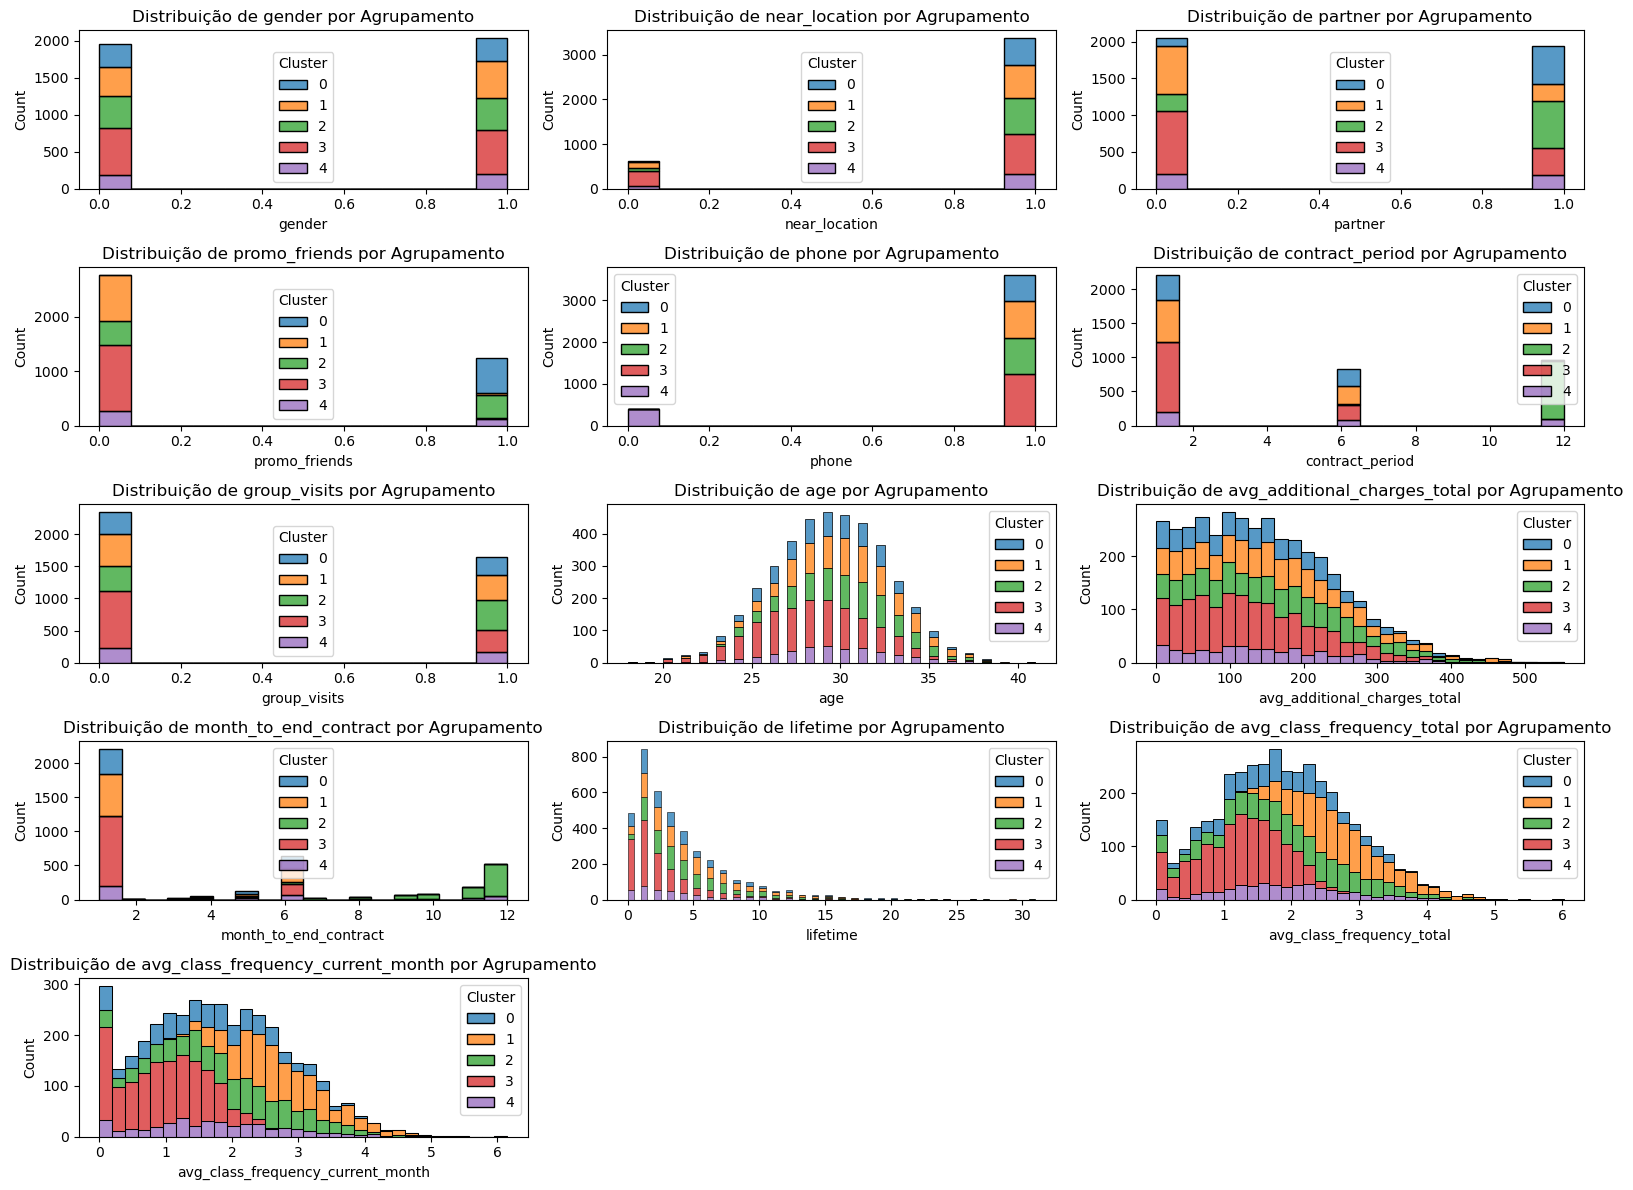

In [35]:
# listando as características (colunas) para as quais queremos fazer a distribuição
features = gym_churn.columns[:-2]  # Excluindo 'Churn' e 'Cluster' para focar nas características

# criando gráficos de distribuição para cada característica
plt.figure(figsize=(16, 12))

# iterando pelas características e criando um gráfico para cada uma
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Subplot com 5 linhas e 3 colunas
    sns.histplot(data=gym_churn, x=feature, hue='Cluster', multiple='stack', palette='tab10')
    plt.title(f'Distribuição de {feature} por Agrupamento')

# ajustando o layout
plt.tight_layout()
plt.show()

### 3.6 Taxa de rotatividade por agrupamento

In [36]:
# calculando a taxa de rotatividade para cada agrupamento
churn_rate_per_cluster = gym_churn.groupby('Cluster')['churn'].mean()
print("Taxa de rotatividade por agrupamento:\n", churn_rate_per_cluster)

Taxa de rotatividade por agrupamento:
 Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: churn, dtype: float64


### 3.7 Conclusões

**Valores Médios das Características para Agrupamentos:**
- **Contract_period**: O Cluster 2 tem um período médio de contrato significativamente maior (11.85 meses) em comparação aos outros clusters, que têm uma média menor (especialmente o Cluster 3, com apenas 1.91 meses).
- **Group_visits**: O Cluster 2 também tem uma maior média de visitas em grupo (0.54), enquanto o Cluster 3 tem a menor participação em visitas em grupo (0.27).
- **Avg_additional_charges_total**: O Cluster 2 também é caracterizado por um gasto médio ligeiramente mais alto em serviços adicionais, indicando um maior engajamento com o serviço.  
  
Esses valores sugerem que o Cluster 2 representa clientes com maior compromisso, enquanto o Cluster 3 parece ser composto por clientes mais novos e com menor engajamento.  
  
**Distribuições de Características por Agrupamento:**  
- **Gender**: Não parece haver uma divisão clara entre os gêneros nos agrupamentos, mas o Cluster 1 tem uma leve predominância masculina.
- **Near_Location**: A maioria dos clientes em todos os clusters reside perto do local do serviço, exceto uma pequena fração no Cluster 3, que tem uma taxa mais baixa.
- **Contract_period**: O Cluster 2 se destaca com contratos mais longos, enquanto o Cluster 3 tende a ter contratos curtos.
- **Age**: Os clientes em todos os clusters têm uma distribuição de idade semelhante, concentrados em torno de 25-35 anos.
- **Lifetime**: O Cluster 2 tem um tempo de vida médio maior, e o Cluster 3 tem uma média bem menor, sugerindo clientes novos ou menos satisfeitos.
  
Essas distribuições mostram que o Cluster 2 representa um perfil de cliente mais "premium", enquanto o Cluster 3 tem clientes com menos engajamento e comprometimento.  

**Taxa de Rotatividade por Agrupamento:**  
- **Cluster 3** tem a maior taxa de rotatividade (57.29%), consistente com o fato de que esses clientes têm contratos curtos e uma baixa média de visitas em grupo, sendo mais propensos a cancelar.
- **Cluster 2** tem a menor taxa de rotatividade (2.19%), indicando que esses clientes têm contratos longos, altos gastos adicionais e um tempo de vida maior com a empresa.
- **Cluster 0** e **Cluster 4** têm uma taxa de rotatividade moderada (24.64% e 26.68%, respectivamente), enquanto o **Cluster 1** tem uma das menores taxas (8.99%).
  
**Conclusão Geral:**  
- **Clientes com maior comprometimento e participação em atividades, como o Cluster 2, tendem a ter uma baixa taxa de rotatividade**, provavelmente por estarem mais satisfeitos com o serviço.
- **Clientes com contratos curtos e menos envolvimento, como o Cluster 3, têm uma probabilidade muito maior de cancelamento**. Esses clientes podem necessitar de mais atenção e estratégias de retenção.
  
Os agrupamentos fornecem insights valiosos para a empresa, permitindo identificar quais perfis de clientes precisam de estratégias específicas de retenção e quais estão mais propensos a permanecer.

## 4. Conclusões e recomendações

### Conclusões e Recomendações sobre Estratégias de Interação e Retenção de Clientes

#### Conclusões Principais:
1. **Clientes com maior compromisso têm menor taxa de rotatividade**:
   - Clientes com contratos mais longos (Cluster 2) e que fazem uso de serviços adicionais tendem a permanecer mais tempo. Esses clientes geralmente investem mais no serviço e têm uma experiência mais completa.

2. **Clientes com menor engajamento e contratos curtos são mais propensos a sair**:
   - O Cluster 3, que é caracterizado por contratos curtos e pouca participação em atividades do clube, apresenta a maior taxa de rotatividade. Estes clientes necessitam de atenção especial para evitar o cancelamento.

3. **A proximidade geográfica influencia a retenção**:
   - A maioria dos clientes em todos os clusters mora próximo ao local da academia, o que sugere que a distância pode ser um fator importante para a retenção. Clientes mais distantes podem ter mais dificuldades para manter a frequência.

#### Recomendações Estratégicas:

1. **Incentivar Compromissos de Longo Prazo**:
   - **Ação de Marketing**: Ofereça descontos ou benefícios adicionais para quem optar por contratos de 6 a 12 meses. Por exemplo, uma redução no valor da mensalidade ou a oferta de pacotes de serviços extras como aulas de grupo gratuitas para quem renovar ou estender o contrato.
   - **Exemplo**: "Renove agora por 12 meses e ganhe 3 meses de aulas de yoga grátis!"

2. **Engajar Clientes com Contratos Curtos**:
   - **Ação de Marketing**: Crie programas de engajamento, como desafios fitness ou competições amigáveis, para incentivar a participação desses clientes. Ofereça recompensas mensais baseadas em frequência ou utilização de serviços adicionais.
   - **Exemplo**: "Participe do Desafio de Frequência: Visite a academia 10 vezes no mês e ganhe um voucher de serviços extras."

3. **Focar em Clientes Geograficamente Próximos**:
   - **Ação de Marketing**: Ofereça promoções locais para reforçar o sentimento de comunidade. Eventos especiais para os residentes do bairro podem aumentar a fidelidade desses clientes e fortalecer a marca localmente.
   - **Exemplo**: "Noite do Bairro: Traga um amigo da vizinhança e aproveite aulas grátis!"

4. **Oferecer Serviços Personalizados para Clientes de Alto Valor**:
   - **Ação de Marketing**: Identifique clientes com maior Lifetime Value (como no Cluster 2) e ofereça pacotes personalizados, incluindo acesso VIP a eventos e serviços, como consultas gratuitas com personal trainers ou nutricionistas.
   - **Exemplo**: "Pacote Premium: Acesso exclusivo a eventos especiais e 2 sessões de personal trainer por mês."

### Resumo:
Concentrar-se em **criar laços de longo prazo** com os clientes, **engajar aqueles menos comprometidos**, e **fomentar um sentimento de comunidade** entre os que moram perto do local pode ajudar a reduzir a taxa de rotatividade e aumentar a retenção. Implementando campanhas de marketing que ofereçam incentivos e recompensas baseadas em comportamento, a empresa pode maximizar o valor de cada cliente.
